# Expendad Window

Expanded window which looks all the past values is used. Since it deviates ground truth values, it is not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mehme\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("cap5.csv")
df.head()

,cycle,ambient_temperature,datetime,capacity
0,1,24,2008-04-02 15:25:41,1.856487
1,2,24,2008-04-02 19:43:48,1.846327
2,3,24,2008-04-03 00:01:06,1.835349
3,4,24,2008-04-03 04:16:37,1.835263
4,5,24,2008-04-03 08:33:25,1.834646


In [4]:
df["datetime"] = pd.to_datetime(df["datetime"],format = "%Y-%m-%d %H:%M:%S")

In [10]:
df['expanding_mean'] = df['capacity'].expanding(2).mean()
df.head(10)

,cycle,ambient_temperature,datetime,capacity,expanding_mean
0,1,24,2008-04-02 15:25:41,1.856487,NaN
1,2,24,2008-04-02 19:43:48,1.846327,1.851407
2,3,24,2008-04-03 00:01:06,1.835349,1.846055
3,4,24,2008-04-03 04:16:37,1.835263,1.843357
4,5,24,2008-04-03 08:33:25,1.834646,1.841614
5,6,24,2008-04-03 12:55:10,1.835662,1.840622
6,7,24,2008-04-03 17:17:16,1.835146,1.839840
7,8,24,2008-04-03 21:28:14,1.825757,1.838080
8,9,24,2008-04-04 01:38:15,1.824774,1.836601
9,10,24,2008-04-04 05:48:08,1.824613,1.835402


Text(0.5, 1.0, 'Title')

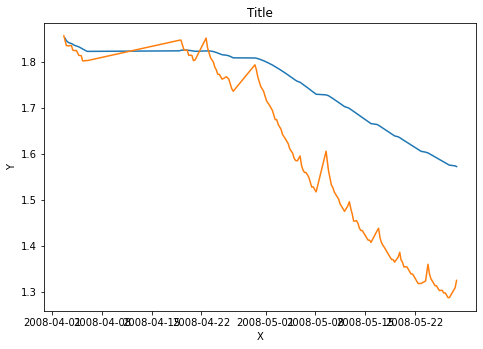

In [12]:
df.rename(columns = {"datetime" : "ds","expanding_mean":"y"}, inplace= True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(df["ds"],df["y"])
ax.plot(df["ds"],df["capacity"])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Title")

In [14]:
df["ds"]

0     2008-04-02 15:25:41
1     2008-04-02 19:43:48
2     2008-04-03 00:01:06
3     2008-04-03 04:16:37
4     2008-04-03 08:33:25
              ...        
163   2008-05-26 10:44:38
164   2008-05-26 15:30:43
165   2008-05-26 20:21:04
166   2008-05-27 15:52:41
167   2008-05-27 20:45:42
Name: ds, Length: 168, dtype: datetime64[ns]